# Exploratory Data Analysis for Small Business Performance Prediction

## Overview

In this notebook, we will perform exploratory data analysis and model building for small business performance prediction. Our goal is to build predictive models to classify whether a business is open or closed based on these features. We will employ Decision Trees and K-Nearest Neighbors, and evaluate their performance using classification reports and confusion matrices.

## Data Processing Steps

1. Load the dataset and inspect its structure.
2. Drop missing values and irrelevant columns.
3. Normalize numerical features.
4. Split the dataset into training and testing sets (80% train, 20% test).


## Results

Both models seem to predict true positives well (businesses that are open) but struggle with true negatives (businesses that are closed). This suggests that we may need additional features, such as review sentiment, business age, and income, to improve the models' ability to identify closed businesses accurately.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/business_economic_data.csv')
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes,categories,hours,geometry,FIPS5,labor_force,employed,unemployed,unemployment_rate,gdp
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN,POINT (-119.7111968 34.4266787),6083.0,220025.0,211137.0,8888.0,4.0,3.199681e+07
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN,POINT (-119.7111968 34.4266787),6083.0,220025.0,211137.0,8888.0,4.0,1.164610e+02
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN,POINT (-119.7111968 34.4266787),6083.0,220025.0,211137.0,8888.0,4.0,3.851246e+07
3,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",POINT (-90.335695 38.551126),29189.0,518804.0,502910.0,15894.0,3.1,9.184719e+07
4,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",POINT (-90.335695 38.551126),29189.0,518804.0,502910.0,15894.0,3.1,1.156970e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439591,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",POINT (-89.9505584 38.7823508),17119.0,134203.0,128629.0,5574.0,4.2,1.006750e+02
439592,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",POINT (-89.9505584 38.7823508),17119.0,134203.0,128629.0,5574.0,4.2,1.457245e+07
439593,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,...,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",POINT (-82.3949096 27.771002),12057.0,801413.0,777140.0,24273.0,3.0,1.157729e+08
439594,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,...,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",POINT (-82.3949096 27.771002),12057.0,801413.0,777140.0,24273.0,3.0,1.322690e+02


In [2]:
# 1. Display basic information about the dataset
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values per column:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

Dataset shape: (439596, 21)
Columns: ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'geometry', 'FIPS5', 'labor_force', 'employed', 'unemployed', 'unemployment_rate', 'gdp']
Missing values per column:
 business_id              0
name                     0
address              15249
city                     0
state                    0
postal_code            181
latitude                 0
longitude                0
stars                    0
review_count             0
is_open                  0
attributes           39994
categories             307
hours                67491
geometry                 0
FIPS5                 5721
labor_force           5721
employed              5721
unemployed            5721
unemployment_rate     5721
gdp                   5721
dtype: int64
Data types:
 business_id           object
name                  object
address               object


In [3]:
# 2. Summary statistics for covariates
COVARS = ['labor_force', 'employed', 'unemployed', 'unemployment_rate', 'gdp']
print("\nSummary statistics for covariates:")
df[COVARS].describe()


Summary statistics for covariates:


,labor_force,employed,unemployed,unemployment_rate,gdp
count,433875.000000,433875.000000,433875.000000,433875.000000,4.338750e+05
mean,424887.692439,410219.254237,14668.438202,3.476155,4.572722e+07
std,215210.341653,207515.875385,8253.885210,0.629904,4.596713e+07
min,1306.000000,1241.000000,65.000000,2.200000,6.589600e+01
25%,264836.000000,253239.000000,8888.000000,3.000000,1.239910e+02
50%,410190.000000,399310.000000,12895.000000,3.400000,3.262478e+07
75%,507381.000000,493316.000000,17820.000000,4.100000,8.752909e+07
max,801413.000000,777140.000000,33732.000000,7.900000,1.414246e+08


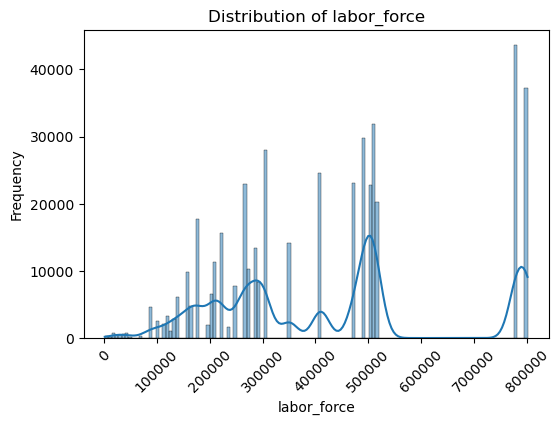

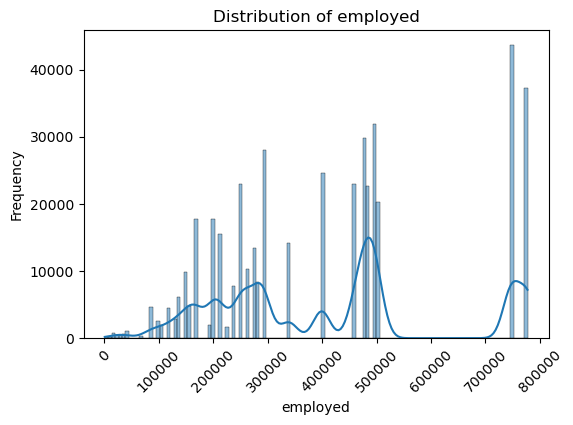

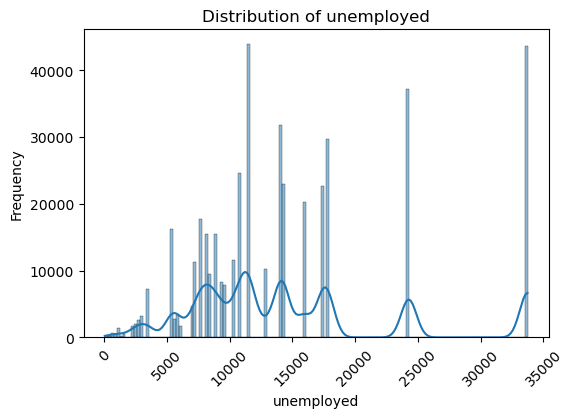

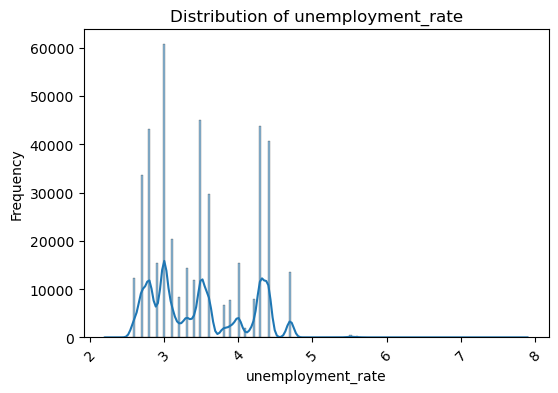

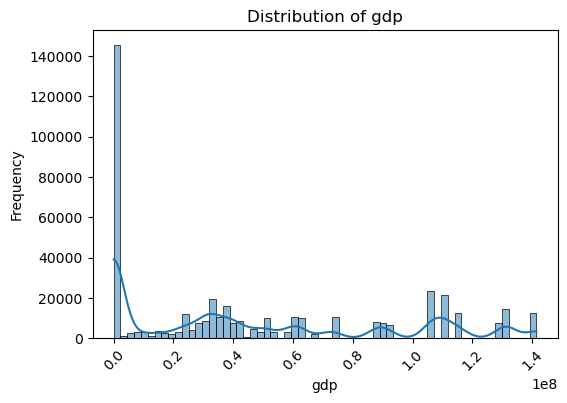

In [4]:
# 2.1 Visualize distributions of covariates
for covar in COVARS:
    plt.figure(figsize=(6,4))
    # Rotate x-ticks for better readability
    sns.histplot(df[covar].dropna(), kde=True)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {covar}')
    plt.xlabel(covar)
    plt.ylabel('Frequency')
    plt.show()

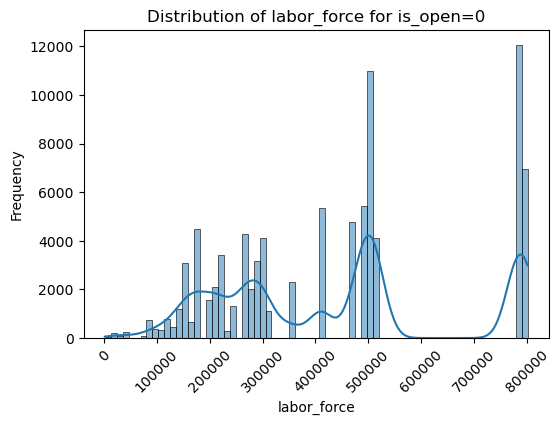

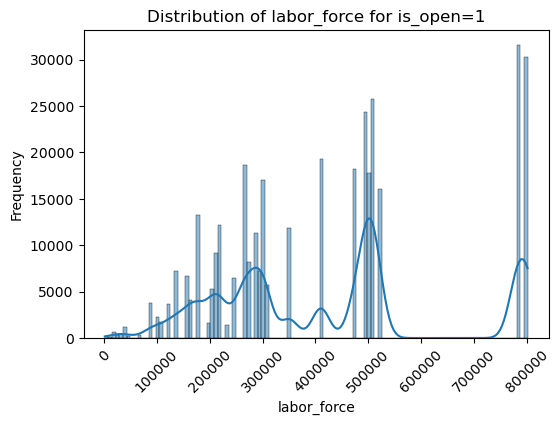

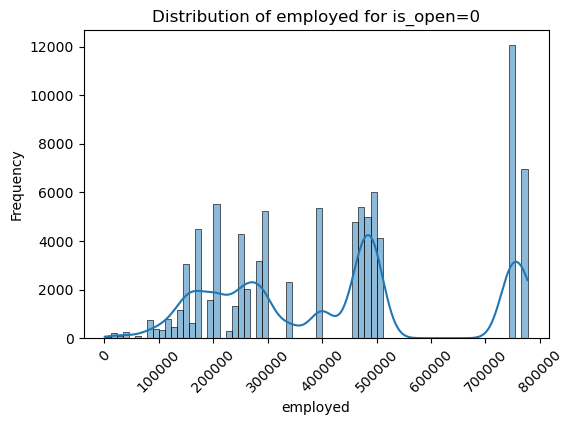

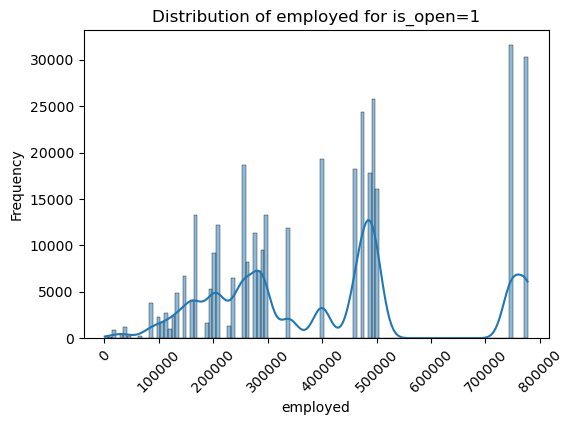

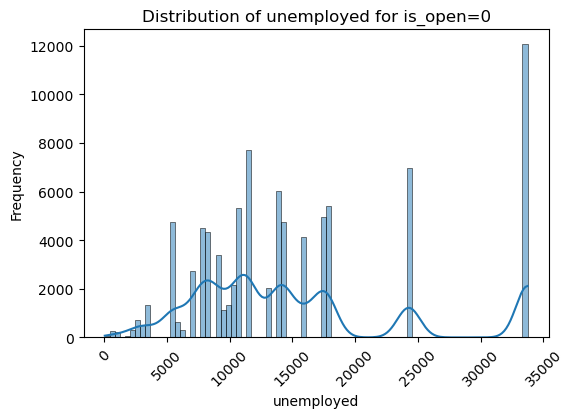

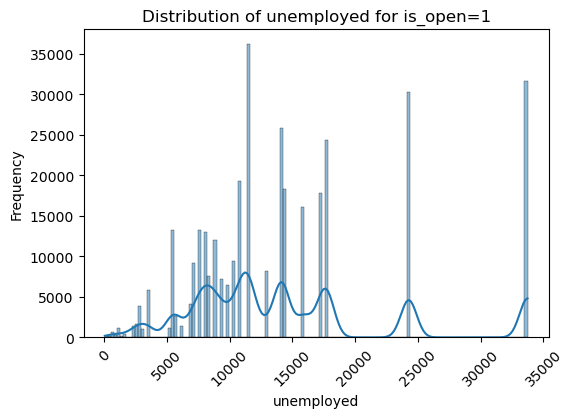

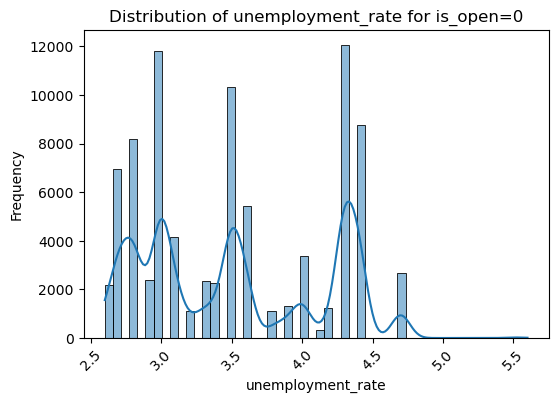

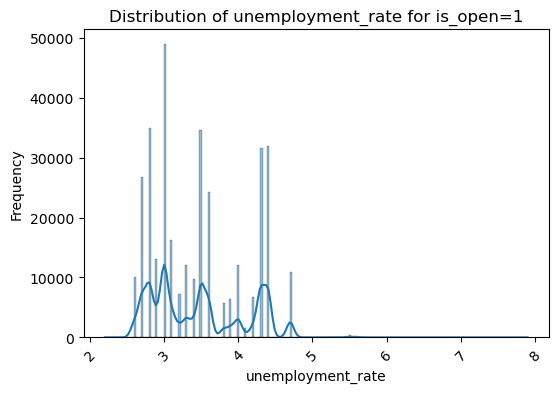

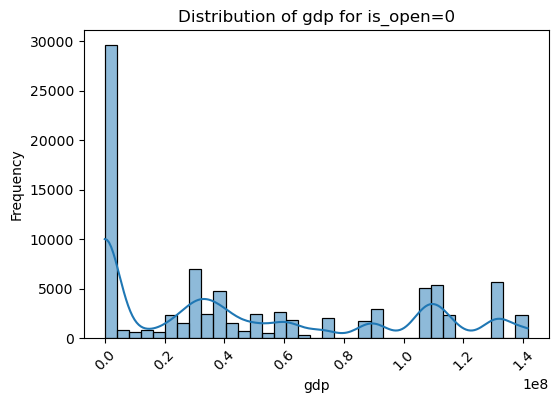

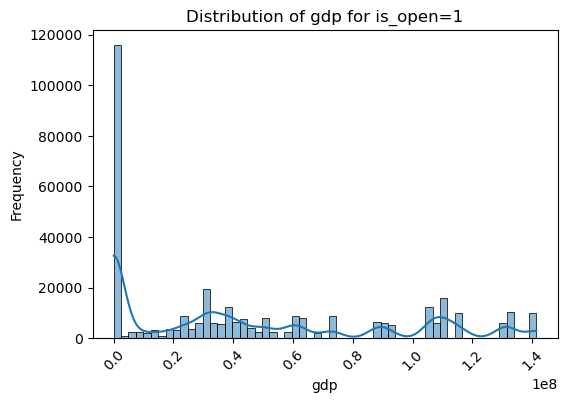

In [5]:
# 2.2 Distribution of covariates by target variable

for covar in COVARS:
    for is_open in [0, 1]:
        subset = df[df['is_open'] == is_open][covar].dropna()
        plt.figure(figsize=(6,4))
        sns.histplot(subset, kde=True)
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {covar} for is_open={is_open}')
        plt.xlabel(covar)
        plt.ylabel('Frequency')
        plt.show()

In [6]:
# 3. Summary statistics for target variable
TARGETS = ['is_open', 'review_count', 'stars']
print("\nSummary statistics for target variables:")
df[TARGETS].describe()


Summary statistics for target variables:


,is_open,review_count,stars
count,439596.000000,439596.000000,439596.000000
mean,0.796554,45.508449,3.600417
std,0.402562,122.479222,0.976057
min,0.000000,5.000000,1.000000
25%,1.000000,8.000000,3.000000
50%,1.000000,15.000000,3.500000
75%,1.000000,38.000000,4.500000
max,1.000000,7568.000000,5.000000


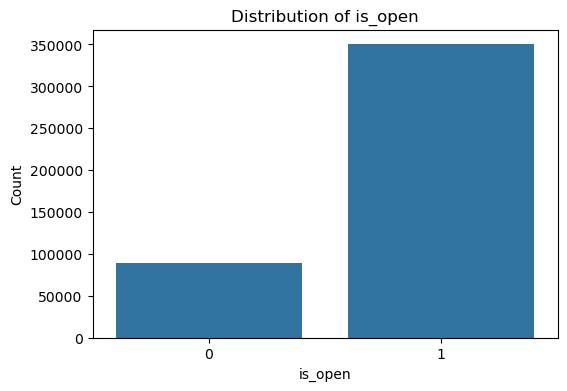

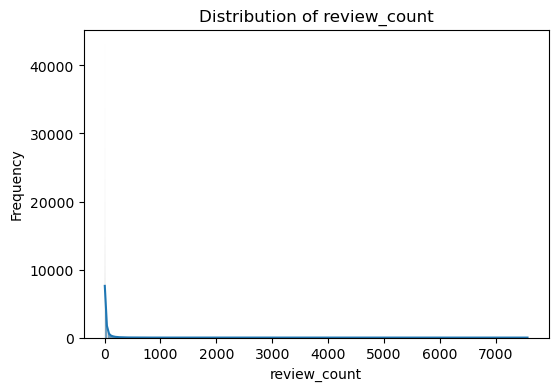

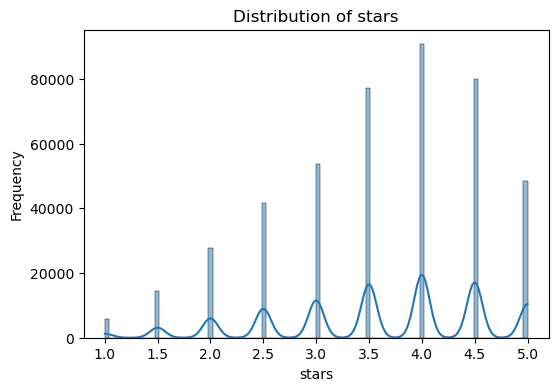

In [7]:
# 3.1 Visualize distribution of target variable
for target in TARGETS:
    if target == 'is_open':
        plt.figure(figsize=(6,4))
        sns.countplot(x=df[target])
        plt.title(f'Distribution of {target}')
        plt.xlabel(target)
        plt.ylabel('Count')
    else:
        plt.figure(figsize=(6,4))
        sns.histplot(df[target].dropna(), kde=True)
        plt.title(f'Distribution of {target}')
        plt.xlabel(target)
        plt.ylabel('Frequency')
    plt.show()

In [8]:
import pandas as pd
import json
import gzip

# Define the path to the gzipped JSONL file
file_path = 'data/Yelp JSON/yelp_dataset/yelp_academic_dataset_review.json.gz'

# List to store selected review data
review_data = []

# Open the gzipped file and read line by line
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        try:
            # Parse each line as a JSON object
            review = json.loads(line)
            # Extract only the necessary columns
            review_data.append({
                'business_id': review['business_id'],
                'stars': review['stars'],
                'useful': review['useful'],
                'text': review['text']
            })
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e} in line: {line.strip()}")
            continue

# Create a DataFrame from the extracted data
reviews = pd.DataFrame(review_data)
reviews

,business_id,stars,useful,text
0,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,"If you decide to eat here, just be aware it is..."
1,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,I've taken a lot of spin classes over the year...
2,YjUWPpI6HXG530lwP-fb2A,3.0,0,Family diner. Had the buffet. Eclectic assortm...
3,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,"Wow! Yummy, different, delicious. Our favo..."
4,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,Cute interior and owner (?) gave us tour of up...
...,...,...,...,...
6990275,jals67o91gcrD4DC81Vk6w,5.0,1,Latest addition to services from ICCU is Apple...
6990276,2vLksaMmSEcGbjI5gywpZA,5.0,2,"This spot offers a great, affordable east week..."
6990277,R1khUUxidqfaJmcpmGd4aw,4.0,1,This Home Depot won me over when I needed to g...
6990278,Rr9kKArrMhSLVE9a53q-aA,5.0,1,For when I'm feeling like ignoring my calorie-...


In [9]:
reviews = reviews.groupby('business_id').apply(lambda x: pd.Series({
    'weighted_avg_stars': (x['stars'] * x['useful']).sum() / x['useful'].sum() if x['useful'].sum() > 0 else x['stars'].mean(),
    'reviews': ' '.join(x['text']),
    'num_reviews': x.shape[0],
    'weighted_avg_review_length': (x['text'].apply(len) * x['useful']).sum() / x['useful'].sum() if x['useful'].sum() > 0 else x['text'].apply(len).mean()
})).reset_index()
df = pd.merge(df, reviews, on='business_id', how='left')
df.fillna({'weighted_avg_stars': 0, 'num_reviews': 0, 'weighted_avg_review_length': 0, 'reviews': ''}, inplace=True)
del reviews
df

/var/folders/zx/x6hb1_p95p33hh3235qrnlqm0000gn/T/ipykernel_73929/4259463221.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reviews = reviews.groupby('business_id').apply(lambda x: pd.Series({


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,FIPS5,labor_force,employed,unemployed,unemployment_rate,gdp,weighted_avg_stars,reviews,num_reviews,weighted_avg_review_length
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,6083.0,220025.0,211137.0,8888.0,4.0,3.199681e+07,4.777778,I've had acupuncture treatments with Abby over...,7,676.333333
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,6083.0,220025.0,211137.0,8888.0,4.0,1.164610e+02,4.777778,I've had acupuncture treatments with Abby over...,7,676.333333
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,6083.0,220025.0,211137.0,8888.0,4.0,3.851246e+07,4.777778,I've had acupuncture treatments with Abby over...,7,676.333333
3,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,29189.0,518804.0,502910.0,15894.0,3.1,9.184719e+07,1.578947,I have a po box there and ea. visit I am greet...,15,598.789474
4,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,29189.0,518804.0,502910.0,15894.0,3.1,1.156970e+02,1.578947,I have a po box there and ea. visit I am greet...,15,598.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439591,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,17119.0,134203.0,128629.0,5574.0,4.2,1.006750e+02,3.428571,Since moving to the area I decided to purchase...,24,802.600000
439592,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,17119.0,134203.0,128629.0,5574.0,4.2,1.457245e+07,3.428571,Since moving to the area I decided to purchase...,24,802.600000
439593,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,...,12057.0,801413.0,777140.0,24273.0,3.0,1.157729e+08,4.333333,I've got all my tattoos here from Paula. She d...,9,863.666667
439594,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,...,12057.0,801413.0,777140.0,24273.0,3.0,1.322690e+02,4.333333,I've got all my tattoos here from Paula. She d...,9,863.666667


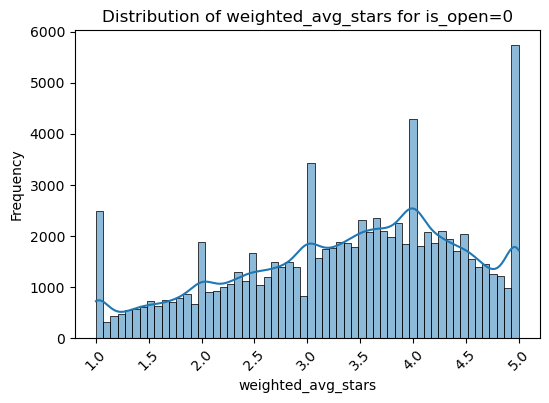

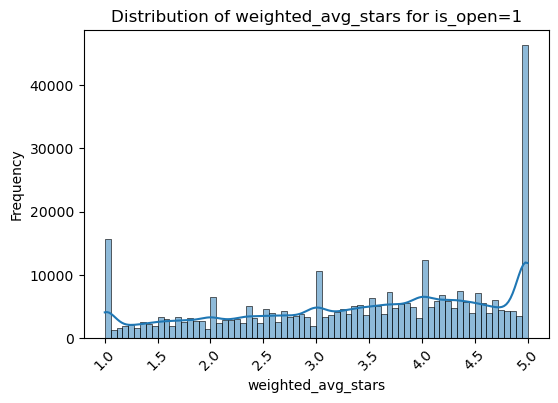

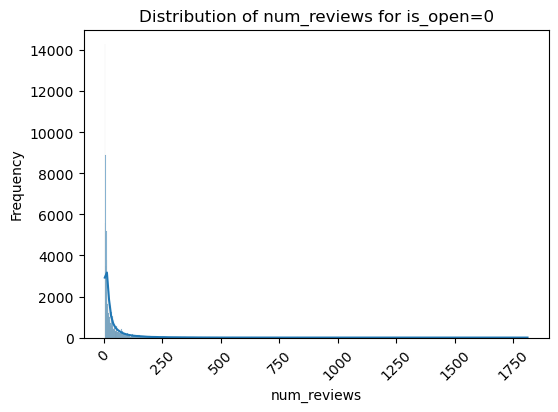

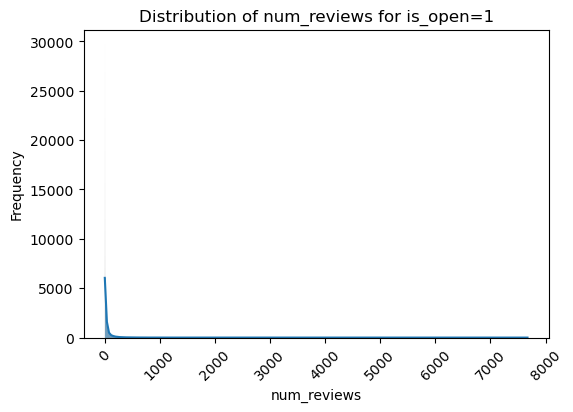

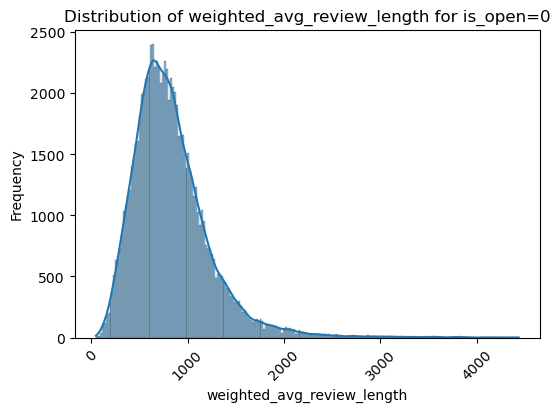

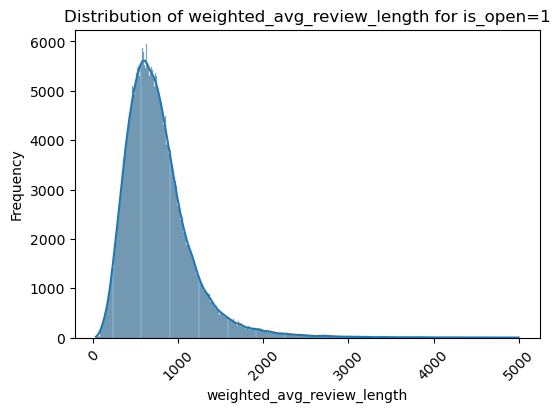

In [10]:
# Plot distribution of weighted average stars, number of reviews, and weighted average review length by is_open
for feature in ['weighted_avg_stars', 'num_reviews', 'weighted_avg_review_length']:
    for is_open in [0, 1]:
        subset = df[df['is_open'] == is_open][feature].dropna()
        plt.figure(figsize=(6,4))
        sns.histplot(subset, kde=True)
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {feature} for is_open={is_open}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

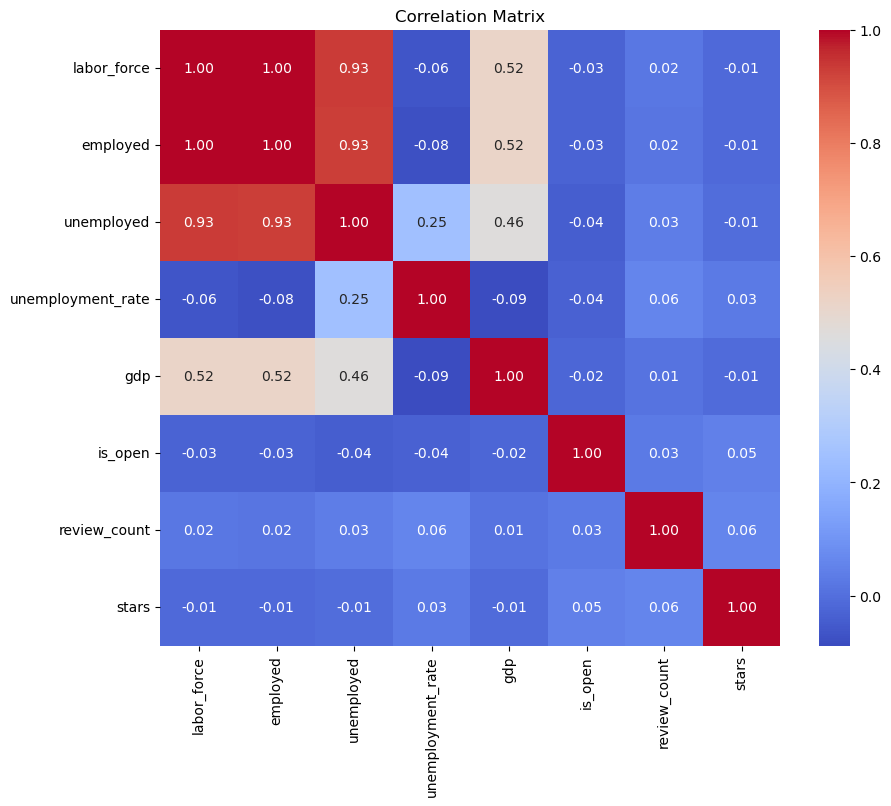

In [48]:
# 4. Correlation analysis
correlation_matrix = df[COVARS + TARGETS].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

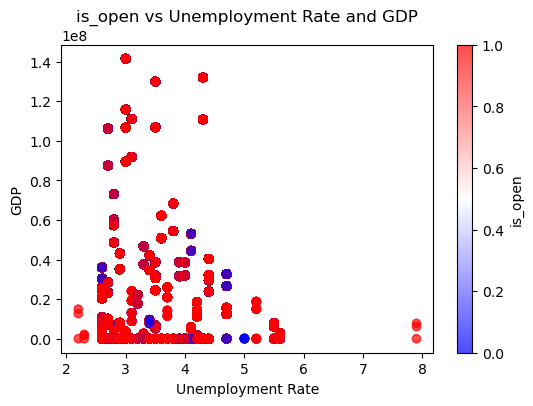

In [49]:
# 5. Scatter plots to visualize relationships
plt.figure(figsize=(6,4))
plt.scatter(df['unemployment_rate'], df['gdp'], c=df['is_open'], cmap='bwr', alpha=0.7)
plt.colorbar(label='is_open')
plt.xlabel('Unemployment Rate')
plt.ylabel('GDP')
plt.title('is_open vs Unemployment Rate and GDP')
plt.show()

In [50]:
# 6. Preprocessing for model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
COVARS = ['unemployment_rate', 'gdp', 'review_count', 'stars']
df = df.dropna(subset=COVARS + ['is_open'])

df[COVARS] = scaler.fit_transform(df[COVARS])

X = df[COVARS]
y = df['is_open']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/zx/x6hb1_p95p33hh3235qrnlqm0000gn/T/ipykernel_50901/3477491736.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[COVARS] = scaler.fit_transform(df[COVARS])


In [51]:
# 6. Fit preliminary Decision Tree and K-Nearest-Neighbors Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dtc, zero_division=np.nan))

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn, zero_division=np.nan))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.13      0.18     17556
           1       0.81      0.93      0.87     69219

    accuracy                           0.77     86775
   macro avg       0.57      0.53      0.53     86775
weighted avg       0.71      0.77      0.73     86775


K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.08      0.13     17556
           1       0.80      0.95      0.87     69219

    accuracy                           0.77     86775
   macro avg       0.54      0.52      0.50     86775
weighted avg       0.70      0.77      0.72     86775



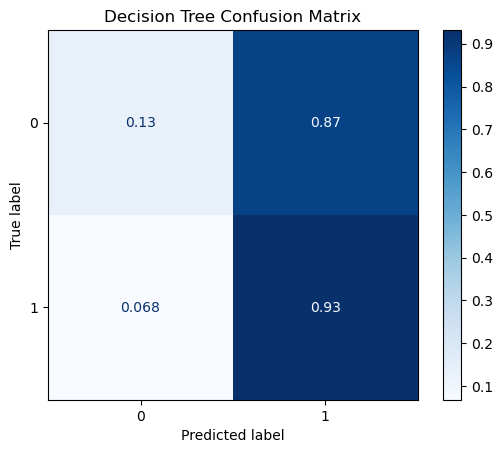

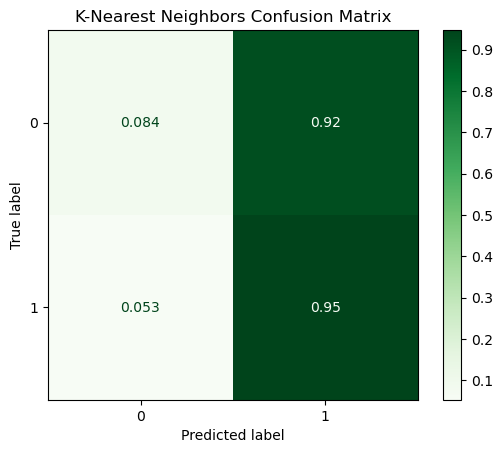

In [52]:
# 6.2 Confusion matrices for both models
from sklearn.metrics import ConfusionMatrixDisplay

disp_dct = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, cmap='Blues', normalize='true')
plt.title('Decision Tree Confusion Matrix')
plt.show()

disp_knn = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Greens', normalize='true')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()